# PROBLEM STATEMENT

Create a learning model to predict whether someone will have heart disease based on given specific lifestyle / health condition / demographic factors.

- Kaggle link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?select=heart_2020_cleaned.csv

- Starting dataset size count: 319.4k

- Count of sample size used: 10k

# DATA DICTIONARY

| Variable         | Description                                                                                                                                                                           | Values                                                                                                                                                                                                    | One-Hot encoding column names                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|
| Diabetic         | (Ever told) (you had) diabetes?                                                                                                                                                       | - "No" = 0.0<br>- "No, borderline diabetes" = 0.5<br>- "Yes (during pregnancy)" = 0.75<br>- "Yes" = 1.0                                                                                                   | - Diabetic_0.0<br>- Diabetic_0.5<br>- Diabetic_0.75<br>- Diabetic_1.0                                                     |
| Sex              | Are you male or female?                                                                                                                                                               | - "Male" = M<br>- "Female" = F                                                                                                                                                                            | - Sex_M<br>- Sex_F                                                                                                        |
| Race             | Given race/ethnicity value                                                                                                                                                            | - "American Indian/Alaskan Native"<br>- "Asian"<br>- "Black"<br>- "Hispanic"<br>- "Other"<br>- "White"                                                                                                    | - Race_American Indian/Alaskan Native<br>- Race_Asian <br>- Race_Black<br>- Race_Hispanic<br>- Race_Other<br>- Race_White |
| HeartDisease     | Respondents that have ever reported having coronary <br>heart disease (CHD) or myocardial infarction (MI)                                                                             | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| BMI              | Body Mass Index (BMI)                                                                                                                                                                 | <i>float</i>                                                                                                                                                                                              | N.A                                                                                                                       |
| Smoking          | Have you smoked at least 100 cigarettes <br>in your entire life? [Note: 5 packs = 100 cigarettes]                                                                                     | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| AlcoholDrinking  | Heavy drinkers (adult men having more than 14 drinks per week <br>and adult women having more than 7 drinks per week                                                                  | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| Stroke           | (Ever told) (you had) a stroke?                                                                                                                                                       | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| PhysicalHealth   | Now thinking about your physical health, which includes <br>physical illness and injury, for how many days during the past <br>30 days was your physical health not good? (0-30 days) | <i>integer</i>                                                                                                                                                                                            | N.A                                                                                                                       |
| MentalHealth     | Thinking about your mental health, for how many days during <br>the past 30 days was your mental health not good? (0-30 days)                                                         | <i>integer</i>                                                                                                                                                                                            | N.A                                                                                                                       |
| DiffWalking      | Do you have serious difficulty walking or climbing stairs?                                                                                                                            | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| AgeCategory      | Thirteen-level age category                                                                                                                                                           | - 18-24 = 1<br>- 25-29 = 2<br>- 30-34 = 3<br>- 35-39 = 4<br>- 40-44 = 5<br>- 45-49 = 6<br>- 50-54 = 7<br>- 55-59 = 8<br>- 60-64 = 9<br>- 65-69 = 10<br>- 70-74 = 11<br>- 75-79 = 12<br>- 80 or older = 13 | N.A                                                                                                                       |
| KidneyDisease    | Not including kidney stones, bladder infection or incontinence, <br>were you ever told you had kidney disease?                                                                        | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| PhysicalActivity | Adults who reported doing physical activity or exercise during <br>the past 30 days other than their regular job                                                                      | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| GenHealth        | Would you say that in general your health is...                                                                                                                                       | - "Excellent" = 5<br>- "Very good" = 4<br>- "Good" = 3<br>- "Fair" = 2<br>- "Poor" = 1                                                                                                                    | N.A                                                                                                                       |
| SleepTime        | On average, how many hours of sleep do you get in a 24-hour period?                                                                                                                   | <i>integer</i>                                                                                                                                                                                            | N.A                                                                                                                       |
| Asthma           | (Ever told) (you had) asthma?                                                                                                                                                         | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |
| SkinCancer       | (Ever told) (you had) skin cancer?                                                                                                                                                    | - "Yes" = 1<br>- "No" = 0                                                                                                                                                                                 | N.A                                                                                                                       |

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from graphviz import Source
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import time

In [11]:
path = 'data/heart_2020_cleaned.csv'
df = pd.read_csv(path)

df.replace('No', 0, inplace=True) #replace all yes/no values in df with binary int values
df.replace('Yes', 1, inplace=True)
df.replace({'Diabetic':{'No, borderline diabetes': 0.5, 'Yes (during pregnancy)': 0.75}}, inplace=True) #replacing string values with integer values
df.replace({'AgeCategory':{'18-24': 1, '25-29': 2, '30-34': 3, 
'35-39': 4, '40-44': 5, '45-49': 6, '50-54': 7, '55-59': 8,
 '60-64': 9, '65-69': 10, '70-74': 11, '75-79': 12, '80 or older': 13}}, inplace=True)
df.replace({'GenHealth':{'Excellent': 5, 'Very good': 4, 'Good': 3, 
'Fair': 2, 'Poor': 1}}, inplace=True)
df.head(15)


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,8,White,1.0,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,13,White,0.0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,10,White,1.0,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,12,White,0.0,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,5,White,0.0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,Female,12,Black,0.0,0,2,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,Female,11,White,0.0,1,2,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,Female,13,White,1.0,0,3,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,Female,13,White,0.5,0,2,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,Male,10,White,0.0,1,3,10.0,0,0,0


In [12]:
encoder = LabelEncoder() # converting categorical values to One-Hot encoding table for training data
pd.set_option('display.max_columns', None)
df_sex = df['Sex']
df_db = df['Diabetic']
df_race = df['Race']
dum_df_sex = pd.get_dummies(df_sex, columns=["Sex"], prefix='Sex')
dum_df_db = pd.get_dummies(df_db, columns=["Diabetic"], prefix='Diabetic')
dum_df_race = pd.get_dummies(df_race, columns=["Race"], prefix='Race')
df = df.join([dum_df_sex, dum_df_db, dum_df_race])
df.drop(['Sex', 'Diabetic', 'Race'], axis=1, inplace=True)

In [13]:
class_0 = df[df['HeartDisease'] == 0]
class_1 = df[df['HeartDisease'] == 1]
class_0_under = class_0.sample(5000) #undersampling to create 50/50 ratio of 1 and 0 results in HeartDisease
class_1_under = class_1.sample(5000)
df_under = pd.concat([class_0_under, class_1_under], axis=0) #concatenate both undersampled sets to create input data for training models
print(df_under['HeartDisease'].value_counts())

0    5000
1    5000
Name: HeartDisease, dtype: int64


In [14]:
corr_mat = df_under.corr()
corr_mat

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sex_Female,Sex_Male,Diabetic_0.0,Diabetic_0.5,Diabetic_0.75,Diabetic_1.0,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
HeartDisease,1.000000,0.088088,0.207614,-0.063186,0.231612,0.240173,0.062017,0.294138,0.434860,-0.160673,-0.397521,0.006985,0.043492,0.187774,0.111543,-0.127613,0.127613,-0.260026,0.030524,-0.017904,0.264096,0.006679,-0.051980,-0.013396,-0.062728,-0.006357,0.065427
BMI,0.088088,1.000000,0.007104,-0.042013,0.035985,0.109493,0.078021,0.196247,-0.038963,-0.150178,-0.204129,-0.050787,0.114512,0.066688,-0.051322,-0.019310,0.019310,-0.248715,0.058915,0.007641,0.236978,0.024948,-0.063871,0.073095,0.031232,0.011064,-0.057316
Smoking,0.207614,0.007104,1.000000,0.100025,0.078402,0.129020,0.085854,0.129939,0.135919,-0.100208,-0.209311,-0.010482,0.028841,0.059393,0.032742,-0.099844,0.099844,-0.068551,0.001181,-0.006040,0.072451,0.052802,-0.047359,-0.045252,-0.086999,0.006512,0.077565
AlcoholDrinking,-0.063186,-0.042013,0.100025,1.000000,-0.027761,-0.030228,0.039471,-0.063591,-0.090346,0.019002,0.037291,-0.000611,-0.008015,-0.044340,0.001550,-0.015649,0.015649,0.070486,-0.000995,-0.000773,-0.073336,-0.002938,0.000040,-0.028155,-0.026951,-0.004194,0.037160
Stroke,0.231612,0.035985,0.078402,-0.027761,1.000000,0.172445,0.074912,0.212595,0.147788,-0.099443,-0.218727,0.018744,0.061249,0.099257,0.055342,0.008553,-0.008553,-0.125879,0.000842,-0.013908,0.134044,0.037739,-0.025989,0.018969,-0.019360,0.001008,-0.003766
PhysicalHealth,0.240173,0.109493,0.129020,-0.030228,0.172445,1.000000,0.335640,0.448715,0.117492,-0.272511,-0.550687,-0.072682,0.126358,0.166461,0.031706,0.045243,-0.045243,-0.183765,0.019354,0.011422,0.183193,0.036516,-0.040945,0.007600,-0.003967,0.023659,-0.012115
MentalHealth,0.062017,0.078021,0.085854,0.039471,0.074912,0.335640,1.000000,0.184161,-0.130424,-0.135980,-0.270664,-0.125719,0.126661,0.057790,-0.025078,0.113956,-0.113956,-0.068616,0.019203,0.031719,0.058993,0.035731,-0.023739,0.023982,0.020740,0.035358,-0.048419
DiffWalking,0.294138,0.196247,0.129939,-0.063591,0.212595,0.448715,0.184161,1.000000,0.251660,-0.322340,-0.468506,-0.031679,0.126445,0.185057,0.043970,0.078148,-0.078148,-0.245471,0.029637,-0.006260,0.247108,0.035896,-0.047487,0.055150,-0.005667,-0.002993,-0.025131
AgeCategory,0.434860,-0.038963,0.135919,-0.090346,0.147788,0.117492,-0.130424,0.251660,1.000000,-0.125786,-0.232782,0.114205,-0.077341,0.141498,0.259002,0.005164,-0.005164,-0.199331,0.037194,-0.031626,0.200430,-0.041042,-0.091740,-0.048793,-0.165854,-0.066831,0.209151
PhysicalActivity,-0.160673,-0.150178,-0.100208,0.019002,-0.099443,-0.272511,-0.135980,-0.322340,-0.125786,1.000000,0.311427,0.013779,-0.057484,-0.117260,0.006281,-0.081810,0.081810,0.153397,-0.022264,0.001107,-0.152507,-0.013688,0.020507,-0.031184,-0.053998,0.002642,0.050239


In [15]:
df_under.drop(['MentalHealth', 'SleepTime', 'Asthma', 'Race_American Indian/Alaskan Native', 'Race_Asian', 'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White'], axis=1, inplace=True)
#feature selection based on correlation matrix values. assumption is that factors are linearly related

In [16]:
X = df_under.iloc[:, 1:-1]
y = df_under['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# K-NN

In [17]:
k_array = np.arange(1, 21, 1) #simulating various values for n_neighbors to arrive at optimal value for accuracy score
nn_value = 0 #automated replacement of values for actual fit model
nn_ac = 0
for k in k_array:
    knn_ex = KNeighborsClassifier(n_neighbors = k)
    knn_ex.fit(X_train, y_train)
    ac = accuracy_score(y_test, knn_ex.predict(X_test))
    if ac>nn_ac:
        nn_ac=ac
        nn_value=k

In [18]:
knn = KNeighborsClassifier(n_neighbors = nn_value)
start_time = time.time()
knn.fit(X_train, y_train)
print("Time taken for training: %s seconds" % (time.time() - start_time))
print("n_neighbors value is: ", nn_value)

Time taken for training: 0.001999378204345703 seconds
n_neighbors value is:  13


In [26]:
start_time = time.time()
y_pred_knn = knn.predict(X_test)
print("Time taken for prediction: %s seconds" % (time.time() - start_time))
print("The accuracy score is {:.4f}.".format(accuracy_score(y_test, y_pred_knn)))

Time taken for prediction: 0.4239969253540039 seconds
The accuracy score is 0.7316.


In [20]:
confusion_matrix(y_test, y_pred_knn)

array([[912, 357],
       [314, 917]], dtype=int64)

In [21]:
f1_score(y_test, y_pred_knn, average = 'micro')

0.7316

# DECISION TREE

In [22]:
depth_value = 0 #automated replacement of values for actual fit model
depth_ac = 0
for k in k_array: #simulating various values for max_depth to arrive at optimal value for accuracy score
    dt = DecisionTreeClassifier(max_depth = k) 
    dt.fit(X_train, y_train)
    ac = accuracy_score(y_test, dt.predict(X_test))
    if ac>depth_ac:
        depth_value = k
        depth_ac = ac

In [23]:
dt = DecisionTreeClassifier(max_depth = depth_value)
start_time = time.time()
dt.fit(X_train, y_train)
print("Time taken for training: %s seconds" % (time.time() - start_time))

Time taken for training: 0.007996320724487305 seconds


In [24]:
start_time = time.time()
y_pred_dt = dt.predict(X_test)
print("Time taken for prediction: %s seconds" % (time.time() - start_time))
print("The accuracy score is {:.3f}.".format(accuracy_score(y_test, y_pred_dt)))

Time taken for prediction: 0.0019996166229248047 seconds
The accuracy score is 0.747.


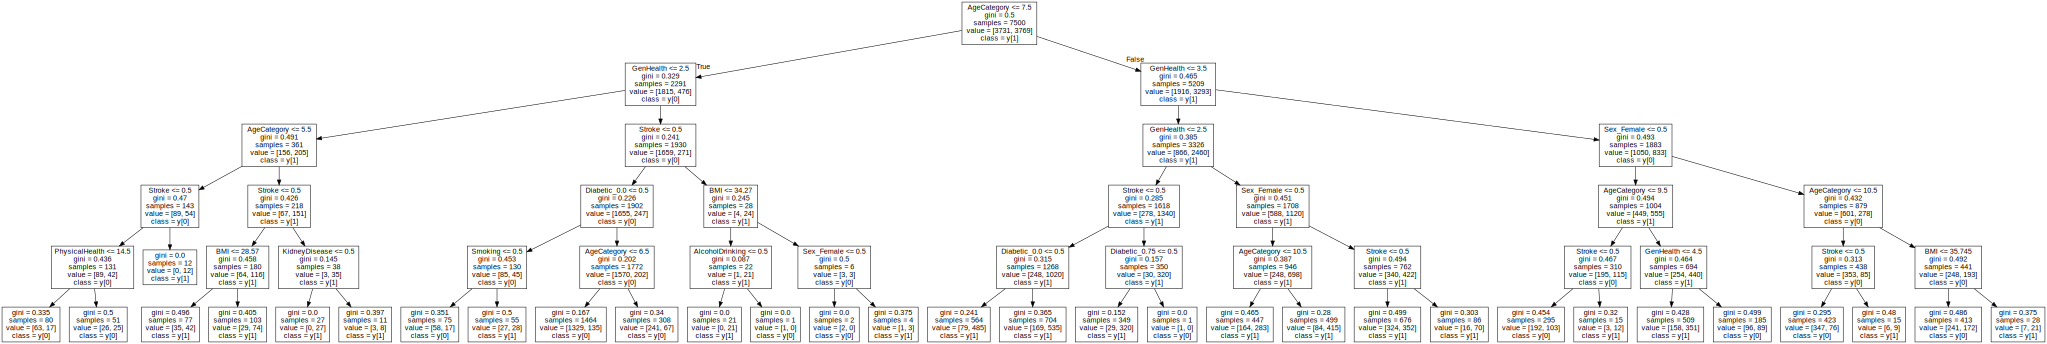

In [25]:
Source(tree.export_graphviz(dt, out_file=None, class_names=True, feature_names= X_train.columns))

# DURATION OF TRAINING/PREDICTION

|          | **Training**        | **Prediction**      | **Total**      |
|----------|---------------------|---------------------|----------------|
| **K-NN** | 0.0019993782043457s | 0.4239969253540039s | _0.425996304s_ |
| **DT**   | 0.0079963207244873s | 0.0019996166229248s | _0.009995937s_ |

# CONCLUSION

<b>ANALYSIS:</b>
1. Initial dataset had major class imbalance (9% vs. 91% distribution of values in class). If left unaddressed, models using this will have a significant false negative flaw. 

2. Undersampling in the training data was appropriate as loss of data was countered with relatively large sample size. Training data used had a split of 50% vs 50% in the class.

3. K-NN's optimal n_neighbor value is relatively high as training data's feature dimensions were sufficient to prevent underfitting. Higher n_neighbor value helps reduce noise which gave slightly better K-NN accuracy scores in our case.

4. Accuracy score and F1-Score (for K-NN, based on confusion matrix) were equal as a result of the equalised class values in training data.

5. From the correlation matrix's quantifiable metrics:
- Age has the strongest linear relationship with heart disease which is logical as people would tend to have more health issues as they grow older. 
- If a patient is diabetic, it is also a relatively strong indicator for heart disease probability. This is likely from related health issues limiting exercise or as a result of a sedentary lifestyle. 
- A history of stroke will also be another key indicator, likely for the same reasons as diabetes.
- Males will be more predisposed to heart disease while females will be less likely to have it - this is shown by the positive correlation for males and negative correlation for females.

6. From the decision tree's optimal root node selection, it supports our above point on age being the strongest factor. Other higher priority nodes are general health and difficulty walking.  

7. The features included for this model includes qualitative data that can be inconsistent or influenced. For example, one person's benchmark for general health may not be the same as someone else. If they know that general health will influence the prediction outcome of heart disease, they might subconsciously also be inclined to choose a more favourable response. Since general health is a key indicator in our model, this means the accuracy may also be compromised.

8. An overview of the influential metrics over heart disease prediction (age, diabetes, stroke, difficulty walking) also shows a common factor - time spent exercising. Though there is an existing feature with related data (PhysicalActivity), the definition is broad and doesn't show enough detail - hence a poorer correlation. Our assumption is that the accuracy of this model can be further improved by defining PhysicalActivity to have binned values where we can categorise participants broadly into "High", "Medium", "Low" or "None" based on threshold hours exercised per week. There would likely be a stronger relationship shown with the other highlighted features and the class values. As the refined PhysicalActivity feature will also be a quantifiable metric, it is less likely to be inaccurate from subjective individual benchmarks. 
 
<b>Accuracy score comparison:</b> 
DECISION TREE (0.752) vs K-NN (0.746) = <u>DECISION TREE</u>
- Feature selection may have reduced noise, which impacts K-NN's accuracy more which is sensitive to this problem. Smaller gap between the accuracy of both models may be a result of this.

<b>Duration comparison:</b>
DECISION TREE (0.009995937s) vs K-NN (0.361994267s) = <u>DECISION TREE</u>

<b>WHAT WE HAVE LEARNT</b>
- From the decision tree learning model, people aged 55 and above with general health self rated good and below have the highest risk profile for heart disease.
- Decision Tree is more favored for this dataset and problem statement with slightly higher accuracy and significantly shorter computation time. This is in line with our understanding of K-NN not being suitable for larger datasets such as this.

